In [1]:
import scipy
import numpy
import matplotlib
import numpy as np
import os
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

from __future__ import division

In [6]:
hbar=1.0545718E-34
omega=(0.001*1.6E-19)/hbar
mstar=0.067*9.1094E-31
e=1.6E-19

def H0(range):
    return 1

def H1(range):
    return 2*(range)

def H2(range):
    return 4*(range)**2-2

def H3(range):
    return 8*(1)*(range)**3-12*(1)*(range)

def H4(range):
    return 16*(1)*(range)**4-48*(1)*(range)**2+12

def H5(range):
    return 32*(1)*(range)**5-160*(1)*(range)**3+120*(1)*(range)

def H6(range):
    return 64*(1)*(range)**6-480*(1)*(range)**4+720*(1)*(range)**2-120

def psi1(range):
    return (mstar*omega/(np.pi*hbar))**(1/4)*(1/np.sqrt(2))*np.exp(-(mstar*omega/(2*hbar))*range**2)

def psi2(range):
    return (mstar*omega/(np.pi*hbar))**(1/4)*(1/np.sqrt(2))*H1(range)*np.exp(-(mstar*omega/(2*hbar))*range**2)

def psi3(range):
    return (mstar*omega/(np.pi*hbar))**(1/4)*(1/np.sqrt(8))*H2(range)*np.exp(-(mstar*omega/(2*hbar))*range**2)

def psi4(range):
    return (mstar*omega/(np.pi*hbar))**(1/4)*(1/np.sqrt(48))*H3(range)*np.exp(-(mstar*omega/(2*hbar))*range**2)

def psi5(range):
    return (mstar*omega/(np.pi*hbar))**(1/4)*(1/np.sqrt(384))*H4(range)*np.exp(-(mstar*omega/(2*hbar))*range**2)

def psi6(range):
    return (mstar*omega/(np.pi*hbar))**(1/4)*(1/np.sqrt(3840))*H5(range)*np.exp(-(mstar*omega/(2*hbar))*range**2)

def psi7(range):
    return (mstar*omega/(np.pi*hbar))**(1/4)*(1/np.sqrt(46080))*H6(range)*np.exp(-(mstar*omega/(2*hbar))*range**2)

In [33]:
lam=40E-3
w0=200E-3
z0=np.pi*w0*w0/lam
R=2
k=2*np.pi/lam
def width(l):
    return np.sqrt(w0*w0*(1+l*l/(z0*z0)))
def radiusin(l):
    return l+z0*z0/l
def radius(m,l):
    rr=2/np.sqrt((mstar*omega/(2*hbar)))*1E6
    for i in range(0,m):
                rr=rr+l+z0*z0/l
                rr=rr*R/(R-2*rr)
    return rr
def theta(l):
    return np.arctan(l/z0) 

C:\Users\platonov\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:42: ComplexWarning: Casting complex values to real discards the imaginary part


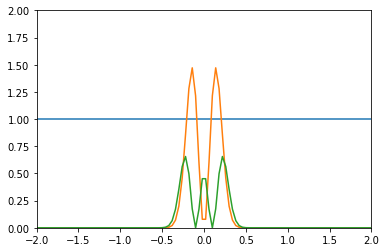

In [49]:
m=1
def psi0p(y,l,m):
    psi=np.exp(-1j*(k)*l)    
    return psi
def psi1p(y,l,m):
    psi=w0/width(l)*np.exp(-y*y/np.power(width(l),2))*np.exp(-1j*(k)*y*y/(2*radius(m,l)))*np.exp(-1j*(k)*l+1j*theta(l))    
    return psi
def psi1pin(y,l,m):
    psi=w0/width(l)*np.exp(-y*y/np.power(width(l),2))*np.exp(-1j*(k)*y*y/(2*radius(m,l)))*np.exp(-1j*(k)*l+1j*theta(l))    
    return np.power(abs(psi),2)
def psi2p(y,l,m):
    psi=w0/width(l)*H1(y*np.sqrt(2)/width(l))*np.exp(-np.power(y*np.sqrt(2)/width(l),2)/2)*np.exp(-1j*(k)*y*y/(2*radius(m,l)))*np.exp(-1j*(k)*l+3/2*1j*theta(l))    
    return psi
def psi2pin(y,l,m):
    psi=w0/width(l)*H1(y*np.sqrt(2)/width(l))*np.exp(-np.power(y*np.sqrt(2)/width(l),2)/2)*np.exp(-1j*(k)*y*y/(2*radius(m,l)))*np.exp(-1j*(k)*l+3/2*1j*theta(l))    
    return np.power(abs(psi),2)
def psi3p(y,l,m):
    psi=w0/width(l)*H2(y*np.sqrt(2)/width(l))*np.exp(-np.power(y*np.sqrt(2)/width(l),2)/2)*(1/np.sqrt(8))*np.exp(-1j*(k)*y*y/(2*radius(m,l)))*np.exp(-1j*(k)*l+5/2*1j*theta(l))    
    return psi
def psi3pin(y,l,m):
    psi=w0/width(l)*H2(y*np.sqrt(2)/width(l))*np.exp(-np.power(y*np.sqrt(2)/width(l),2)/2)*(1/np.sqrt(8))*np.exp(-1j*(k)*y*y/(2*radius(m,l)))*np.exp(-1j*(k)*l+5/2*1j*theta(l))    
    return np.power(abs(psi),2)
def psi4p(y,l,m):
    psi=w0/width(l)*H3(y*np.sqrt(2)/width(l))*np.exp(-np.power(y*np.sqrt(2)/width(l),2)/2)*(1/np.sqrt(48))*np.exp(-1j*(k)*y*y/(2*radius(m,l)))*np.exp(-1j*(k)*l+7/2*1j*theta(l))    
    return psi
def psi4pin(y,l,m):
    psi=w0/width(l)*H3(y*np.sqrt(2)/width(l))
    np.exp(-np.power(y*np.sqrt(2)/width(l),2)/2)*(1/np.sqrt(48))
    np.exp(-1j*(k)*y*y/(2*radius(m,l)))*np.exp(-1j*(k)*l+7/2*1j*theta(l))    
    return np.power(abs(psi),2)
#print psi1p(2,2,1,0.1)
#print H4(0*np.sqrt(2)/width2(0))
x=np.linspace(-20, 20, num=1000)
y=np.linspace(-2, 2, num=1000)
y2=np.linspace(-2, 2, num=1000)
y3=np.linspace(-2, 2, num=1000)
y4=np.linspace(-2, 2, num=1000)
#plt.plot(x, psi0(x,2,20,1))
for i in range(1,1000):
    y[i]=psi3pin(x[i],0.000001,m)
for i in range(1,1000):
    y2[i]=psi0p(x[i],0.000001,m)
for i in range(1,1000):
    y3[i]=psi2pin(x[i],0.00001,m)
for i in range(1,1000):
    y4[i]=psi4pin(x[i],0.00001,m)
#plt.plot(x,y)
plt.plot(x,y2)
plt.plot(x,y3)
plt.xlim(-2,2)
plt.ylim(0,2)
plt.plot(x,y)
#plt.plot(x,y4)
#plt.plot(x,x*np.sqrt(2)/width2(x))
#plt.plot(x,H1(x*np.sqrt(2)/width2(10)))


ValueError: x and y must have same first dimension, but have shapes (1000L,) and (1L,)

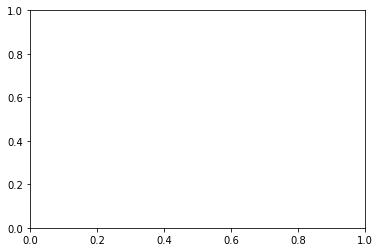

In [46]:
import scipy.integrate as integrate
def psisum0(y,l,r,m):
    summ0=0
    for i in range(1,m):
        summ0=summ0+(1-r)*np.power(r,i)*psi0p(y,l*i,i)
    #print summ
    return np.power(abs(summ0),2)
def psisum1(y,l,r,m):
    summ1=0
    for i in range(1,m):
        summ1=summ1+(1-r)*np.power(r,i)*psi1p(y,l*i,i)
    #print summ
    return np.power(abs(summ1),2)
def psisum2(y,l,r,m):
    summ2=0
    for i in range(1,m):
        summ2=summ2+(1-r)*np.power(r,i)*psi2p(y,l*i,i)
    #print summ
    return np.power(abs(summ2),2)
def psisum3(y,l,r,m):
    summ3=0
    for i in range(1,m):
        summ3=summ3+(1-r)*np.power(r,i)*psi3p(y,l*i,i)
    #print summ
    return np.power(abs(summ3),2)
def psisum4(y,l,r,m):
    summ4=0
    for i in range(1,m):
        summ4=summ4+(1-r)*np.power(r,i)*psi4p(y,l*i,i)
    #print summ4
    return np.power(abs(summ4),2)

plt.plot(x,psisum0(x,4,0.97,10))
plt.xlim(-20,20)
plt.ylim(0,0.002)
#print psisum1(3,10,0.9,10)

In [28]:
from scipy.integrate import quad
def intens0(l,r,m):
    return quad(psisum0, -5, 5, args=(l,r,m))[0]
def intens1(l,r,m):
    return quad(psisum1, -5, 5, args=(l,r,m))[0]
def intens1in(l,m):
    return quad(psi1pin, -5, 5, args=(l,m))[0]
def intens2(l,r,m):
    return quad(psisum2, -5, 5, args=(l,r,m,kk))[0]
def intens2in(l,m):
    return quad(psi2pin, -5, 5, args=(l,m))[0]
def intens3(l,r,m):
    return quad(psisum3, -5, 5, args=(l,r,m))[0]
def intens3in(l,m):
    return quad(psi3pin, -5, 5, args=(l,m))[0]
def intens4(l,r,m):
    return quad(psisum4, -5, 5, args=(l,r,m))[0]
def intens4in(l,m):
    return quad(psi4pin, -5, 5, args=(l,m))[0]
print intens4(10,0.9,100)

0.00163294985103


In [29]:
r=0.92
m=10
kk=0.001
z=np.linspace(4.2, 3.6, num=150)
res0=np.linspace(4.2, 3.6, num=150)
res1=np.linspace(4.2, 3.6, num=150)
res2=np.linspace(4.2, 3.6, num=150)
res3=np.linspace(4.2, 3.6, num=150)
res4=np.linspace(4.2, 3.6, num=150)


for i in range(1,100):
 #   res0[i]=intens0(z[i],r,m,kk)
    res0[i]=intens0(z[i],r,m,kk)
                    
    res1[i]=intens1(z[i],r,m,kk)/intens1in(0.00001,m,kk)
 #   res2[i]=intens2(z[i],r,m,kk)/intens2in(0.00001,m,kk)
 #   res3[i]=intens3(z[i],r,m,kk)/intens3in(0.00001,m,kk)
 #   res4[i]=intens4(z[i],r,m,kk)/intens4in(0.00001,m,kk)
 #   res2[i]=intens2(z[i],r,m,kk)
    
#print intens2in(0.00001,m,kk)
#plt.ylim(0,0.0001)

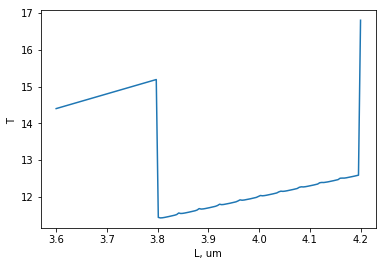

In [30]:

#def geo(l,r):
#    return 1/(1+4*r/np.power((1-r),2)*np.power(np.sin(np.pi*l/lam),2))
#plt.plot(z,res0, 'b')
#plt.plot(z,res1+res2, 'm')
#plt.plot(z,res1, 'x')
#plt.plot(z,res2, 'r')
#plt.plot(z,res3, 'b')
#plt.plot(z,res4, 'm')
#plt.plot(z,res1+res2, 'x')
#plt.plot(z,res1+res2+res3, 'x')
plt.plot(z,res1+res2+res3+res4, '-')
#plt.plot(z,geo(z,0.8), '')
#plt.ylim(0.0,0.0015)
#plt.xlim(3.85,4.15)
plt.xlabel("L, um")
plt.ylabel("T ")
x=np.linspace(2, 1.8, num=150)
#plt.plot((-exp2[0])/3.6+3.61,0.09+exp2[1]*1E9/82, 'ob')
#plt.plot((-exp2[0])/3.6+3.61,exp2[9]*1E9/2500, 'ob')
#plt.savefig('D:\\3.pdf', format='pdf')

In [1273]:
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit
import numpy as np


m=20
for i in range(1,2):
    x=exp2[0,90:240]
    data=exp2[i,90:240]

    def fcn2min(params, x, data):
        """ model decaying sine wave, subtract data"""
        a = params['a']
        b = params['b']
        kk = params['c']
        r = params['d']
        
        f1=a+b*intens(z,r,m,kk)
        return f1 - data


    params = Parameters()
    params.add('a',   value= -0.2)
    params.add('b', value= 1,min=1 )
    params.add('c',   value= -0.2)
    params.add('d', value= 1,min=1 )
    


    minner = Minimizer(fcn2min, params, fcn_args=(x, data))
    kws  = {'options': {'maxiter':100}}
    result = minner.minimize()
    result.params


    final = data + result.residual
    

    report_fit(result)
  

    plt.plot(x, data, 'o')
    plt.plot(x, final, 'r')

    params2=result.params
    v = params2.valuesdict()

error: Supplied function does not return a valid float.

In [ ]:
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit
import numpy as np


for i in range(1,2):
    x=exp2[0,90:240]
    data=exp2[i,90:240]
    def fcn2min(params, x, data):
        """ model decaying sine wave, subtract data"""
        f = params['f']
        a = params['a']
        b = params['b']
        c = params['c']
        d = params['d']
        e = params['e']
        a2 = params['a2']
        b2 = params['b2']
        f1=-0.4+a/(1+(b)*np.power(np.sin(c+x*1000/49.25),2))
        f2=a2/(1+(b2)*np.power(np.sin(c+x*1000/(49.25)+0.125*4000/(49.25)),2))
        f3=0.5/(1+(2)*np.power(np.sin(c+x*1000/(49.25)-0.125*2000/(49.25)),2))
        model=f1+f2
        return model - data

    params = Parameters()
    params.add('f',   value= -0.2)
    params.add('a', value= 1,min=1 )
    params.add('a2', value= 2, min=0.5)
    params.add('b2', value=1, min=1)
    params.add('b', value= 10 , min=1, max=20)
    params.add('c', value= 3.0)
    params.add('d', value= 3.0, min=0.5)
    params.add('e', value= 3.0, min=1)
   

    minner = Minimizer(fcn2min, params, fcn_args=(x, data))
    kws  = {'options': {'maxiter':100}}
    result = minner.minimize()
    result.params

    final = data + result.residual
    
    report_fit(result)

    plt.plot(x, data, 'o')
    plt.plot(x, final, 'r')

    params2=result.params
    v = params2.valuesdict()
    a[1,i]=v['b']


In [ ]:
for i in range(1,2):
    plt.plot(exp2[0,90:240],exp2[i,90:240])
   # plt.plot(exp2[0],dat)
    #plt.xlim(-2,-1.25)
    #plt.ylim(0,0.8)
plt.savefig('D:\\sl1.pdf', format='pdf')


In [60]:
for i in range(1,10):
    a[1,i]=np.abs(np.pi/(2*np.arcsin(1/np.sqrt(a[1,i]))))


NameError: name 'a' is not defined

In [61]:
for i in range(1,10):
    plt.plot(a[0,i],a[1,i], 'or')
plt.savefig('D:\\slf.pdf', format='pdf')    

NameError: name 'a' is not defined

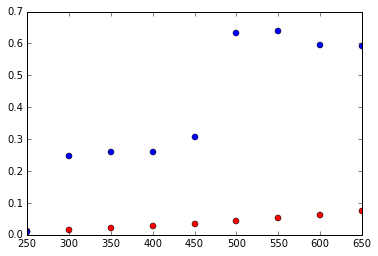

In [497]:
for i in range(1,10):
    plt.plot(a[0,i],1/np.power(2.4*1000/a[0,i],2), 'or')
for i in range(1,10):
    plt.plot(a[0,i],1/np.power(a[1,i],2), 'ob')
plt.savefig('D:\\sl4.pdf', format='pdf')    

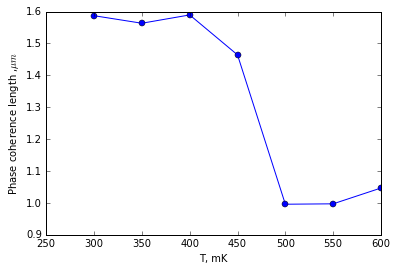

In [498]:
for i in range(1,10):
    a[1,i]=1/np.sqrt(1/np.power(a[1,i],2)-1/np.power(2.4*1000/a[0,i],2))
plt.plot(a[0,1:10],a[1,1:10]*2.4/np.pi, 'o-')
#plt.plot(a[0],a[1])
plt.xlabel("T, mK")
plt.ylabel("Phase coherence length ,$\mu m$")
plt.xlim(250,600)
#plt.ylim(1.1,1.9)
plt.savefig('D:\\sl5.pdf', format='pdf')


In [499]:
import scipy
import scipy.fftpack
import pylab
from scipy import pi
t = scipy.linspace(0,241,241)

for i in range(1,10):
    FFT = abs(scipy.fft(exp2[i]))
    freqs = scipy.fftpack.fftfreq(exp2[i].size, t[1]-t[0])
    exp2[i]=FFT
    exp2[0]=freqs

#pylab.subplot(211)
#pylab.plot(t, signal)
#plt.xlim(-2,0.7)
#pylab.subplot(212)
#pylab.plot(freqs,np.log(FFT) )
#plt.xlim(-100,100)
#plt.ylim(-19,-24)
#plt.savefig('/home/sergey/Documents/s4', format='pdf')
#pylab.show()

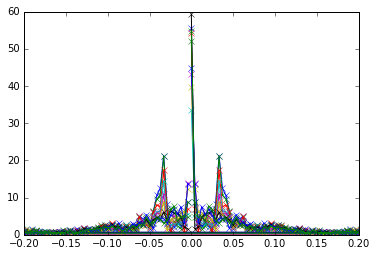

In [500]:
for i in range(1,10):
    plt.plot(exp2[0],exp2[i], 'x-')
    plt.xlim(-0.2,0.2)
  #  plt.ylim(0,0.5E-7)
plt.savefig('D:\\p3.pdf', format='pdf')

In [501]:
exp2[1]

array([ 55.58525114,   8.7219773 ,   3.2850747 ,   2.3684156 ,
         3.11471503,   2.20426626,   1.74597598,   8.15432103,
        21.31392302,  12.52344466,  10.56644849,   6.20876602,
         1.65343601,   4.13666571,   4.29964494,   5.00832052,
         1.46639687,   2.93486841,   1.8240556 ,   2.66344674,
         1.56758304,   3.18700454,   2.29032122,   2.71026117,
         2.1826103 ,   2.58321423,   1.92366857,   0.38428177,
         0.75735279,   1.42689154,   0.80897724,   1.805626  ,
         0.69390635,   1.64810431,   1.10185929,   1.01047305,
         1.15109926,   1.06393024,   0.63260861,   0.81165326,
         0.41788611,   0.4480663 ,   0.58547795,   0.76496071,
         0.98209145,   0.89752988,   1.6611044 ,   0.54572041,
         0.50145557,   1.36741159,   1.69779244,   1.26450687,
         0.41847191,   0.76144038,   0.4867135 ,   0.59958907,
         0.1629547 ,   0.4547721 ,   0.54954409,   0.48437745,
         0.47710751,   0.7466255 ,   0.63746049,   0.65

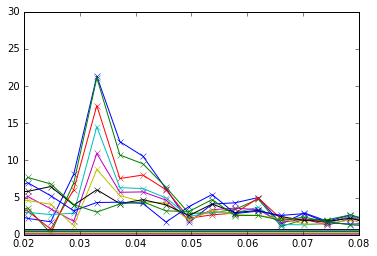

In [502]:
for i in range(1,10):
    plt.plot(exp2[0],exp2[i], '-x')
    plt.xlim(0.02,0.08)
    plt.ylim(0,30)

In [503]:
a=np.empty([2, 10])

In [504]:
for i in range(1,10):
    a[0,i]=250+50*(i-1)

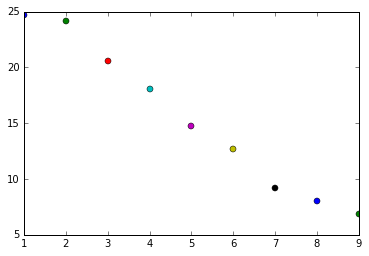

In [25]:
for i in range(1,10):
    plt.plot(i,exp2[i,8], 'o')
    a[1,i]=exp2[i,8]

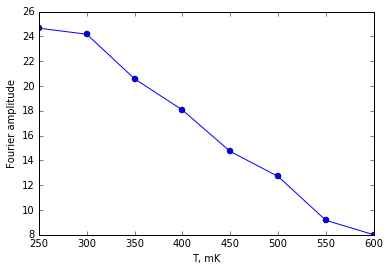

In [26]:
plt.plot(a[0,1:9],a[1,1:9], 'o-')
#plt.plot(a[0],a[1])
plt.xlabel("T, mK")
plt.ylabel("Fourier amplitude")
#plt.xlim(200,800)
#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(0,1.2E-8)
#plt.savefig('D:\\p4.pdf', format='pdf')

In [27]:
for i in range(1,10):
# a[0,i]=np.log(a[0,i])
    a[1,i]=np.log(a[1,i])

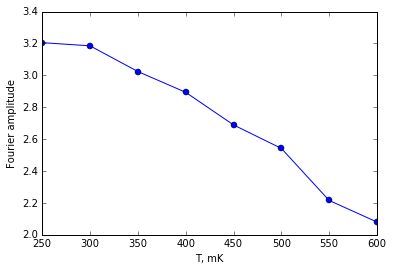

In [28]:
plt.plot(a[0,1:9],a[1,1:9], 'o-')
#plt.plot(a[0],a[1])
plt.xlabel("T, mK")
plt.ylabel("Fourier amplitude")
#plt.xlim(200,800)
#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(0,1.2E-8)
plt.savefig('D:\\p4.pdf', format='pdf')

In [29]:
fitfunc = lambda p, x: p[0]-p[1]*np.power(x,2)*(np.log(p[2]/x))# Target function
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function
p0 = [1, -3/2,1,1] # Initial guess for the parameters

p1, success = optimize.leastsq(errfunc, p0[:], args=(a[0,1:9],a[1,1:9]))
print p1

[  3.41714522e+00  -1.13929675e-06   2.08527007e+01   1.00000000e+00]


[  3.41714522e+00  -1.13929675e-06   2.08527007e+01   1.00000000e+00]


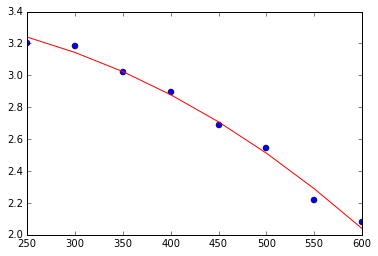

In [30]:
plt.plot(a[0,1:9],a[1,1:9], 'o')
plt.plot(a[0,1:9],fitfunc(p1, a[0,1:9]) ,'r')
#plt.xscale('log')
#plt.yscale('log')
print p1
plt.savefig('D:\\s4.pdf', format='pdf')

In [31]:
np.savetxt('D:\\test.txt', a.transpose(), delimiter=' ')

In [32]:
exp3 = np.fromfile("D:\\r1.txt",dtype=float,count=-1, sep=" ")
exp3 = np.reshape(exp3, (601,5))
exp4 = exp3.transpose()

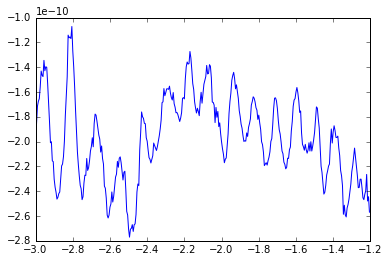

In [33]:
plt.plot(exp4[0,1:360],exp4[1,1:360])

In [34]:
dat2=baseline_als(exp4[1,1:360],100,0.1,10)
exp4[1,1:360]=exp4[1,1:360]-dat2

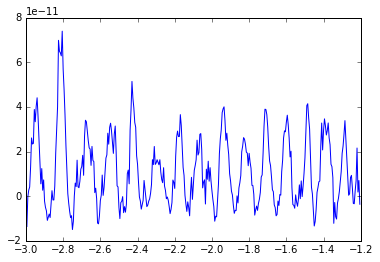

In [35]:
plt.plot(exp4[0,1:360],exp4[1,1:360])

In [36]:
poly = np.polyfit(y,center,4)
x_hat = np.polyval(poly,y)

NameError: name 'center' is not defined

In [ ]:
t = scipy.linspace(-3,-1.2,360)
FFT = abs(scipy.fft(exp4[1,1:360]))
freqs = scipy.fftpack.fftfreq(exp4[1,1:360].size, t[1]-t[0])
exp4[1,1:360]=FFT
exp4[0,1:360]=freqs

In [ ]:
plt.plot(exp4[0,1:360],exp4[1,1:360])
plt.xlim(-30,30)
#plt.ylim(10,40)

In [ ]:
fin[]

In [ ]:
np.savetxt('D:\\fft.txt', exp4.transpose(), delimiter=' ')

In [ ]:
exp4

In [ ]:
l= scipy.linspace(0.01,20,1000)
t = scipy.linspace(0.01,20,1000)
for i in range(0,1000):
    l[i]=88E-9*np.power(t[i]/129.8,-2)*1/(np.log(129.8/t[i])+2)

In [ ]:
l

In [ ]:
plt.plot(t,l)
plt.ylim(0,1E-3)
plt.xlim(0,1)

In [ ]:
for i in range(0,1000):
    l[i]=1.83E-6/t[i]

In [ ]:
plt.plot(t,l)
plt.ylim(0,2E-4)
plt.xlim(0,1)

In [1070]:
exp1 = np.fromfile("D:\phase.dat",dtype=float,count=-1, sep=" ")

In [1071]:
exp1 = np.reshape(exp1, (241,10))
exp2 = exp1.transpose()

In [1117]:
exp2.ndim

2